# **Project 3**, APS1070 Fall 2020
#### **PCA [20 marks]**
**Deadline: Nov 8, 23:59**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Hanzhe Fan
*   **Student number**: 1002522834



We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1-4**.
* The second Covid-19 dataset reports the total number of deaths for each country at the end of each day. We use this dataset in **Part 4**. 
* Finally, we will apply PCA to images using the MNIST dataset of handwritten digits in **Part 5**.

# Part 1: Getting started [3 Marks]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Cases.csv',
    index_col=0,
    thousands=','
)

1. Plot the time-series for the `US`, `China`, ` Canada`, and 7 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. **[1]**
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Plot the standardized time-series for the same countries as you chose in `Step 1`. **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. Why does it man if the curve goes up or down? What do negative and positive values mean? **[1]**

In [ ]:
cases_raw

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24471,25142,25575,26127,26779,27363,27919,28664,29256,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151,36580,37083,37591,37963,38253,38703,39121,39541,39899,40322,40766,41078,41498,41957,42432,42840,43256,43664,43945,44299,44684
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1979,1983,1983,1987,1989,1994,1999,2003,2007,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028,2028,2029,2029,2029,2030,2030,2031,2031,2034,2039,2040,2041,2041,2041,2047,2049,2050,2051,2051,2052,2052
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12523,12639,12709,12776,12836,12952,13112,13214,13323,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175,14389,14443,14491,14515,14612,14641,14660,14715,14759,14802,14830,14974,15052,15089,15170,15224,15301,15339,15415,15458,15549


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facb99ac630>,
      dtype=object)

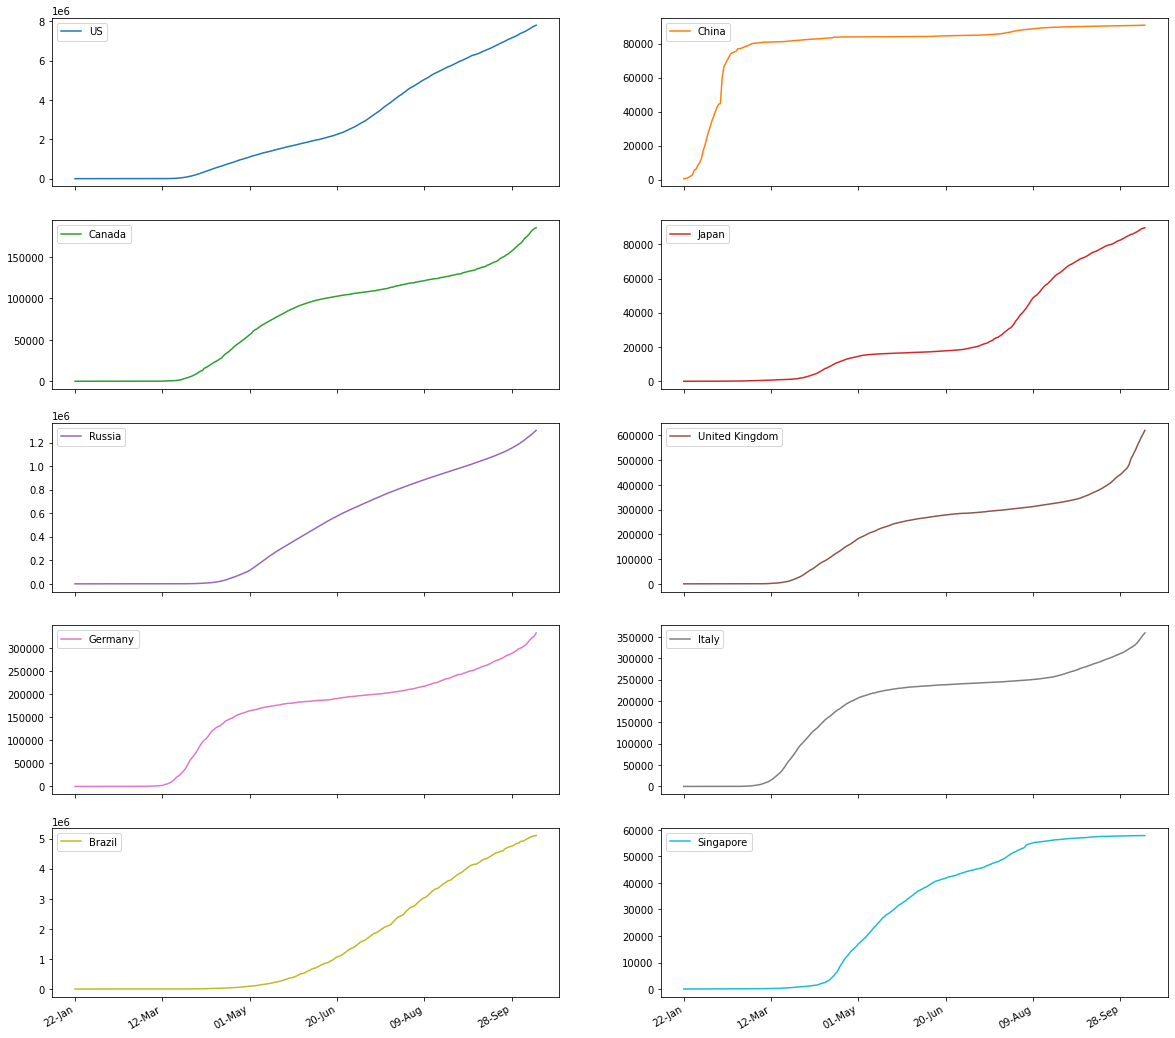

In [ ]:
# Part 1 (1):

import numpy as np
import matplotlib.pyplot as plt
 
country = ['US', 'China', 'Canada', 'Japan', 'Russia', 'United Kingdom', 'Germany', 'Italy', 'Brazil', 'Singapore']
df1 = pd.DataFrame(data = cases_raw.loc[country].T, columns = country) # create a dataframe to store the selected country data
df1.plot(subplots = True,layout = (5,2), figsize = (20,20)) # use subplots to plot the country data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facba0d8828>,
      dtype=object)

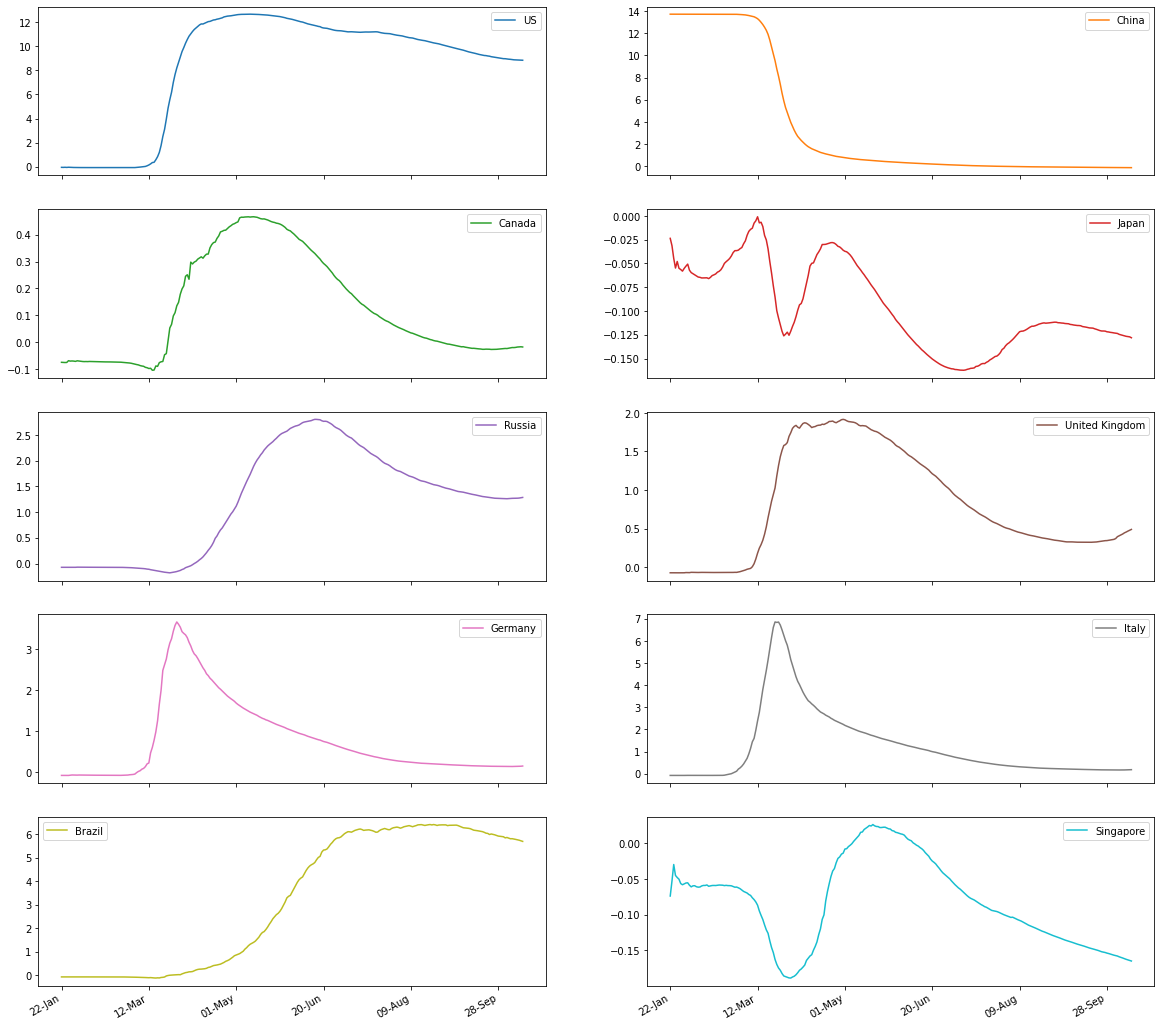

In [ ]:
# Part 1 (2) and (3):

from sklearn.preprocessing import StandardScaler

cases_raw_std = StandardScaler().fit_transform(cases_raw) # standardize the dataset
country = ['US', 'China', 'Canada', 'Japan', 'Russia', 'United Kingdom', 'Germany', 'Italy', 'Brazil', 'Singapore']
df2= pd.DataFrame(data = cases_raw_std, columns = cases_raw.columns, index = cases_raw.index) # create a dataframe to store the standardized dataset
df2_country = pd.DataFrame(data = df2.loc[country].T, columns = country)
df2_country.plot(subplots = True,layout = (5,2), figsize = (20,20)) 

## Part 1 (4):

From the graph, we can see that for US, it remained stable at the beginning and increased dramatically in a short period of time, then, it decreased at a low speed. For China, it has a high value at the beginning and after a shor time, it decreased with a large speed and approached to 0. For Canada, it behaved like a wave.

Curve goes up means the rate of increasing cases of that country in that period of time is larger than the rate of increasing cases around the world in that period

Curve goes down means the rate of increasing cases of that country in that period of time is lower than the rate of increasing cases around the world in that period

Positive value means that the case of the country in that day is higher than the average of the total cases around the world in that day

Negative value means that the case of the country in that day is lower than the average of the total cases around the world in that day


# Part 2: Applying PCA [3 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (265, 265).* **[0.5]**
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.5]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.5]**
4. How many PCs do you need to cover 99\% of the dataset's variance? **[0.5]**
5. Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots). **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [ ]:
# Part 2 (1) and (2):

n, m = df2.shape

# Compute covariance matrix
C = np.cov(df2.T)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eigh(C) 
print('Covariance matrix:\n', C)
print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

Covariance matrix:
 [[ 1.00531915  1.00531231  1.00530539 ... -0.00811522 -0.00817576
  -0.00826843]
 [ 1.00531231  1.00531915  1.00531233 ... -0.00836464 -0.00842515
  -0.00851796]
 [ 1.00530539  1.00531233  1.00531915 ... -0.00791003 -0.00797185
  -0.00805791]
 ...
 [-0.00811522 -0.00836464 -0.00791003 ...  1.00531915  1.0053147
   1.00529883]
 [-0.00817576 -0.00842515 -0.00797185 ...  1.0053147   1.00531915
   1.00530832]
 [-0.00826843 -0.00851796 -0.00805791 ...  1.00529883  1.00530832
   1.00531915]]
Eig Vec:
  [[ 0.          0.          0.         ...  0.03797487  0.12454189
  -0.00544783]
 [ 0.03801734 -0.02842583 -0.00417236 ...  0.03799021  0.12454168
  -0.00542558]
 [-0.00718307  0.00406725  0.00186204 ...  0.03786442  0.12454769
  -0.0054742 ]
 ...
 [ 0.02380659  0.01209037 -0.01024854 ...  0.08330064 -0.015815
  -0.06722094]
 [ 0.00962339 -0.01013913  0.00292975 ...  0.08334383 -0.01581561
  -0.06717972]
 [-0.02722392  0.00344759  0.00596839 ...  0.08297958 -0.01578126
  -0

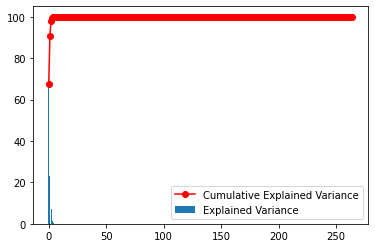

In [ ]:
# Part 2 (3):

args = (-eigenValues).argsort() # sorted the eigenvalues with the descending order
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

plt.bar(range(len(cumExpVar)), expVar, label='Explained Variance') # plot the scree plot
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
cumExpVar

array([ 67.53148737,  90.84137079,  97.91963412,  99.31855519,
        99.83136531,  99.92576373,  99.97196972,  99.98584888,
        99.99262542,  99.99484289,  99.99667229,  99.99776301,
        99.99834872,  99.99874382,  99.99899204,  99.9991838 ,
        99.99936716,  99.99950393,  99.99962245,  99.99969551,
        99.99973992,  99.99977877,  99.99980935,  99.99983477,
        99.99985682,  99.99987546,  99.99989227,  99.99990627,
        99.99991835,  99.9999286 ,  99.99993737,  99.99994463,
        99.99995091,  99.99995626,  99.99996132,  99.99996568,
        99.99996934,  99.99997265,  99.99997566,  99.99997817,
        99.99998057,  99.99998285,  99.99998441,  99.99998582,
        99.9999871 ,  99.99998819,  99.99998926,  99.99999019,
        99.99999105,  99.99999185,  99.99999255,  99.99999321,
        99.9999938 ,  99.99999429,  99.99999474,  99.99999517,
        99.99999556,  99.99999592,  99.99999625,  99.99999655,
        99.99999683,  99.99999709,  99.99999732,  99.99

# Part 2 (4):

From the cumExpVar printed above we can see that only 4 PCs are need to cover 99% of the dataset's variance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facbae54518>,
      dtype=object)

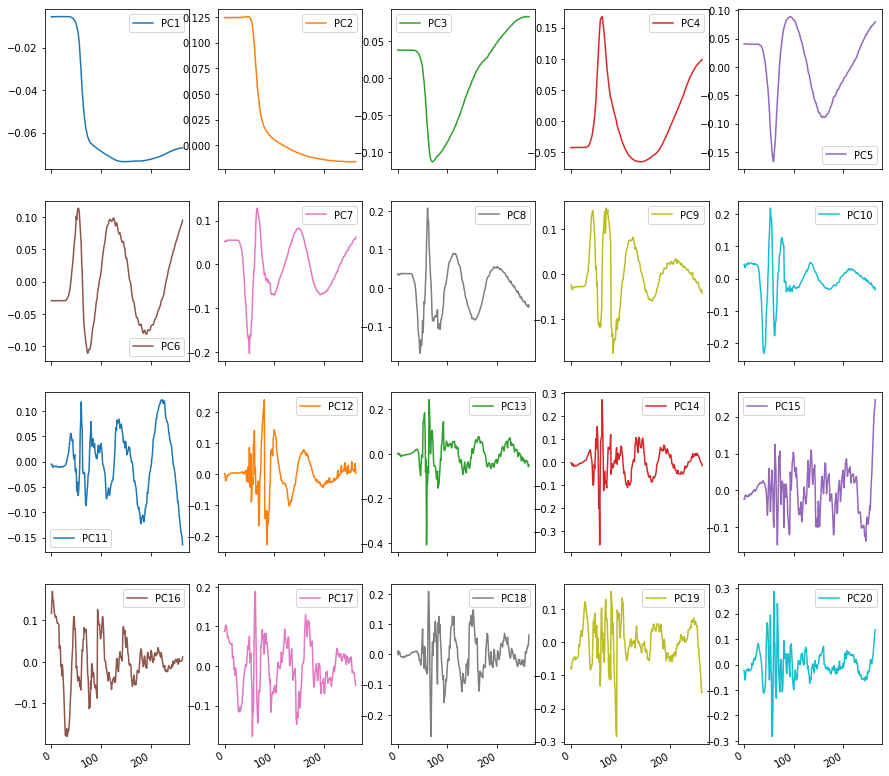

In [ ]:
# Part 2 (5):

PC_count = 20   # Number of PCs
W = eigenVectors[:, 0:PC_count]
PC = [] # create  a list of pc numbers

for i in range (1,21):
  PC_name = 'PC'+ str(i)
  PC.append(PC_name)

df3 = pd.DataFrame(data = W, columns = PC) # create a dataframe to store pc numbers 
df3.plot(subplots = True, layout = (4,5), figsize = (15,15))

# Part 2 (6):

From the graphs above, we can see that first several plots the trend is smooth and is less fluctuated. With more princial components, the curve becomes more fluctuated.

# Part 3: Data reconstruction [6 Marks]

Create a function that:

*   Accepts a country name as an input.
*   Plots 4 figures:
1.   The standardized time-series for the specified country. **[0.5]**
2.   The incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[2]**
3.   The residual error of reconstruction for each of the 10 reconstructions with respect to the standardized time-series. **[1]**
4.   The RMSE of reconstruction as a function of number of included components. **[1]**

*   Prints how many PCs are needed so that the RMSE would be less than $1$, $0.1$ and $0.01$. **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [ ]:
# Part 3 (1), (2) and (3):

def ReCon(country_name):
  country_data = df2.loc[country_name].T # plot the original data 
  plt.title('Original')
  country_data.plot()

  df4 = pd.DataFrame() # create a dataframe to store reconstruction data
  df5 = pd.DataFrame() # create a dataframe to store residual error data

  PC = []
  for i in range (1,11):
    PC_name = 'PC'+ str(i)
    PC.append(PC_name)

  for j in range (1,11):
    W_new = eigenVectors[:, 0:j]
    projX = np.dot(df2.loc[country_name], W_new)
    ReconX = np.dot(projX, W_new.T)
    df4[j] = ReconX # store reconstruction data
    df5[j] = country_data.values - ReconX # calculate and store residual error

  df4.columns = PC # plot reconstruction data with incremental reconstruction data
  df4.plot()
  plt.title('Reconstruction')

  df5.columns = PC # plot residual error
  df5.plot()
  plt.title('Residual Error')

In [ ]:
# Part 3 (4):

def RMSE(country_name_new):
  country_data_new = df2.loc[country_name_new].T
  targets = np.array(country_data_new)
  rmse_value = [] # create an empty list to store rmse values

  for k in range(1,11):
    W_new = eigenVectors[:, 0:k]
    projX_new = np.dot(df2.loc[[country_name_new]], W_new) # projection data
    ReconX_new = np.dot(projX_new, W_new.T) # reconstruction data
    rmse = np.sqrt(((ReconX_new - targets) ** 2).mean()) # calculate RMSE
    rmse_value.append(rmse) # add rmse value to the empty list
  df6 = pd.DataFrame(data = rmse_value, columns = ['RMSE'])
  df6.plot()
  plt.title('RMSE')

  for a in range(10): # find the pc numbers that rmse is < 1
    if rmse_value[a] < 1.0:
      print('There are', a+1, 'PCs are needed for', 'US', 'so that RMSE would be less than 1')
      break
  for b in range(10): # find the pc numbers that rmse is < 0.1
    if rmse_value[b] < 0.1:
      print('There are', b+1, 'PCs are needed for', 'US', 'so that RMSE would be less than 0.1')
      break
  for c in range(10): # find the pc numbers that rmse is < 0.01
    if rmse_value[c] < 0.01:
      print('There are', c+1, 'PCs are needed for', 'US', 'so that RMSE would be less than 0.01')
      break

There are 3 PCs are needed for US so that RMSE would be less than 1
There are 5 PCs are needed for US so that RMSE would be less than 0.1
There are 8 PCs are needed for US so that RMSE would be less than 0.01


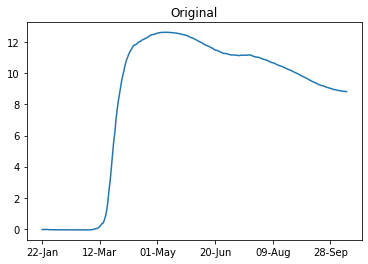

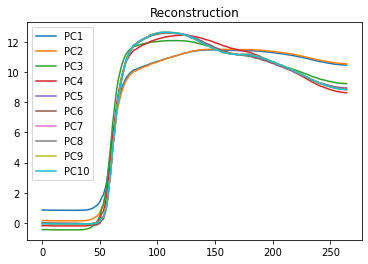

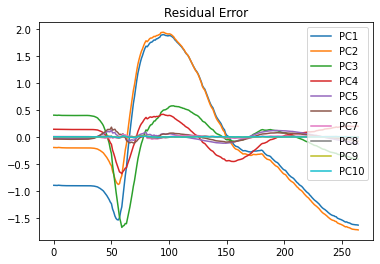

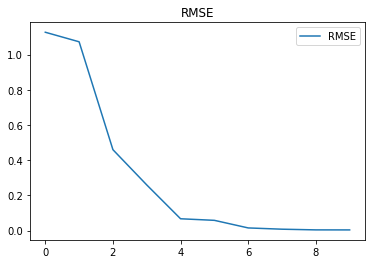

In [ ]:
ReCon('US')
RMSE('US')

There are 1 PCs are needed for US so that RMSE would be less than 1
There are 3 PCs are needed for US so that RMSE would be less than 0.1
There are 7 PCs are needed for US so that RMSE would be less than 0.01


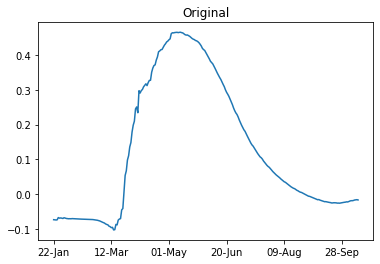

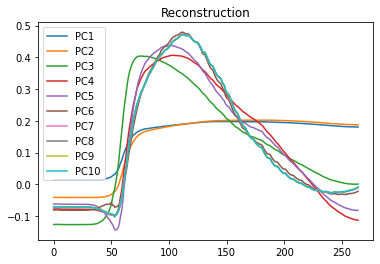

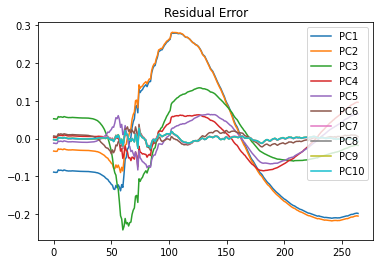

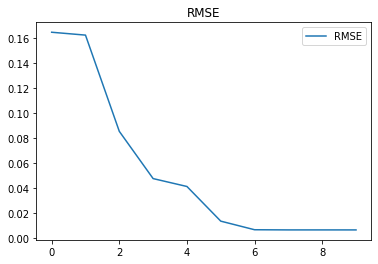

In [ ]:
ReCon('Canada')
RMSE('Canada')

There are 2 PCs are needed for US so that RMSE would be less than 1
There are 4 PCs are needed for US so that RMSE would be less than 0.1
There are 5 PCs are needed for US so that RMSE would be less than 0.01


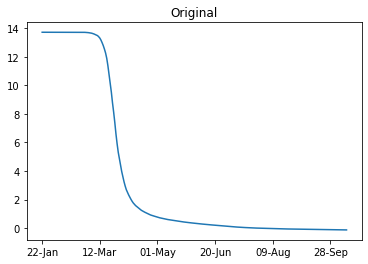

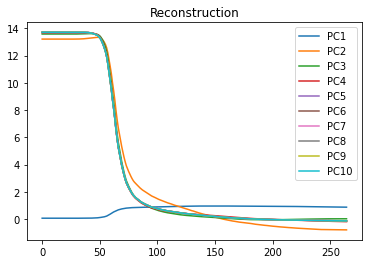

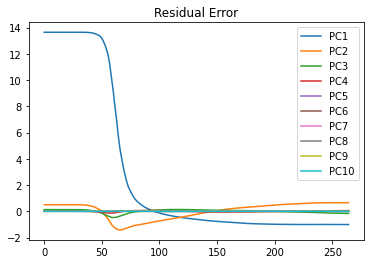

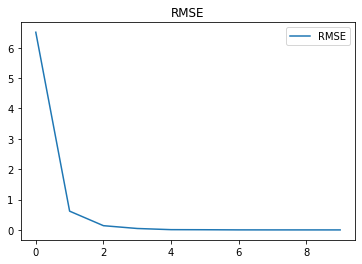

In [ ]:
ReCon('China')
RMSE('China')

# Part 4: Time-series analysis on death cases [3 Marks]
Here we'll use another dataset for total deaths caused by COVID-19 for different countries. 

Call the function that you designed in *Part 3* with this new dataset. To do that you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2) **[1]** and prepare the data for calling the Part 3 function **[1]**. Test your function with the new dataset, with the `US`, `Canada`, and `China`. **[1]**


In [ ]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Dead.csv',
    index_col=0,
    thousands=','
)

In [ ]:
death_raw

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444,1445,1446,1451,1451,1453,1453,1455,1458,1458,1458,1458,1462,1462,1466,1467,1469,1470,1472,1473,1477,1479
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364,367,370,370,373,375,377,380,384,387,388,389,392,396,400,403,407,411,413,416,420,424
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1529,1539,1549,1556,1562,1571,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679,1689,1698,1703,1707,1711,1714,1719,1726,1736,1741,1749,1756,1760,1768,1768,1771,1783,1789,1795,1801,1809
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,54,55,55,55,57
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,115,117,117,120,124,126,130,131,132,134,136,139,143,144,147,147,152,154,155,159,162,167,171,174,176,179,183,185,189,193,195,199,211,211,208,212,218,218,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,167,170,177,181,184,190,192,198,204,210,221,226,229,243,244,250,253,262,265,269,272,274,278,285,291,299,306,311,318,321,329,330,339,349,355,359,367,378,381,387
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,571,572,572,572,573,576,576,580,582,582,583,583,583,583,585,585,585,586,586,586,586,586,587,587,587,587,587,587,587,589,589,591,592,593,593,593,593,595,595,596
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,292,292,292,295,295,297,300,300,306,312,312,320,324,326,326,329,330,330,331,331,332,332,332,332,332,332,332,332,333,333,333,333,334,335,335,335,336,337,337,345


In [ ]:
# Par4 :

death_raw_std = StandardScaler().fit_transform(death_raw) # stnadardize the new data

df2= pd.DataFrame(data = death_raw_std, columns = death_raw.columns, index = death_raw.index) # assign the new data with df2 to subsititue into the function above
C = np.cov(df2.T) # convariance matrix
eigenValues, eigenVectors = np.linalg.eigh(C) # eigenvalues and eigenvectors
args = (-eigenValues).argsort() # sorted the eigenvalues with descending order
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

There are 2 PCs are needed for US so that RMSE would be less than 1
There are 6 PCs are needed for US so that RMSE would be less than 0.1
There are 8 PCs are needed for US so that RMSE would be less than 0.01


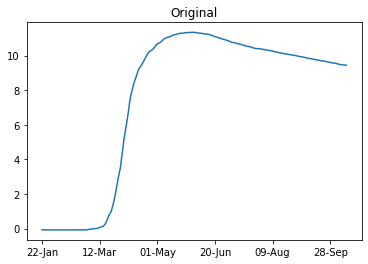

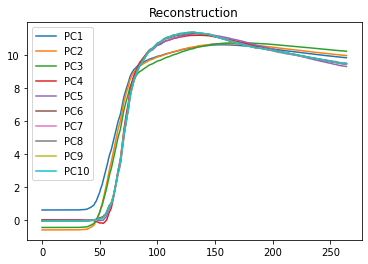

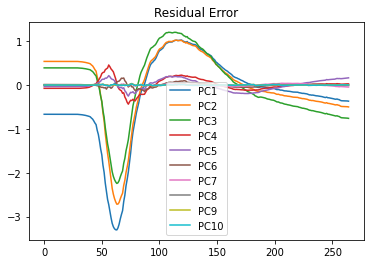

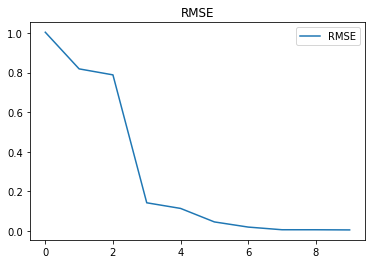

In [ ]:
ReCon('US')
RMSE('US')

There are 1 PCs are needed for US so that RMSE would be less than 1
There are 5 PCs are needed for US so that RMSE would be less than 0.1


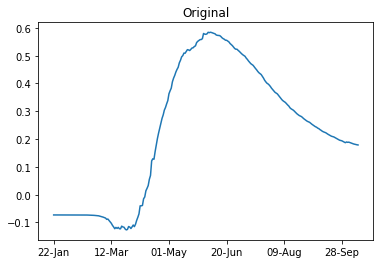

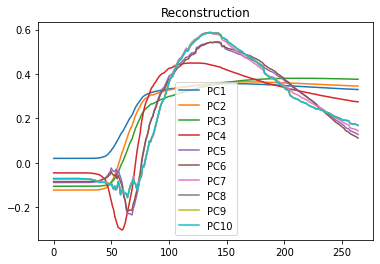

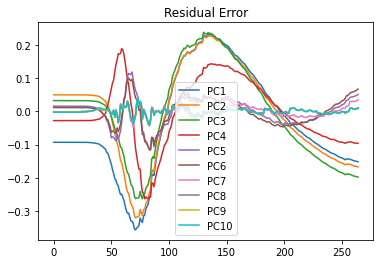

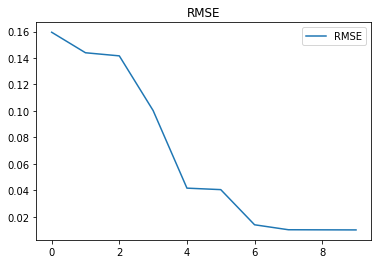

In [ ]:
ReCon('Canada')
RMSE('Canada')

There are 2 PCs are needed for US so that RMSE would be less than 1
There are 4 PCs are needed for US so that RMSE would be less than 0.1
There are 5 PCs are needed for US so that RMSE would be less than 0.01


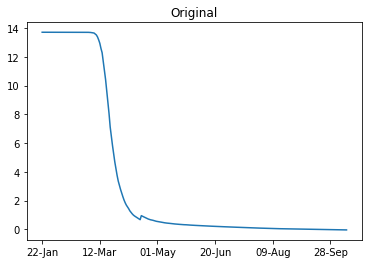

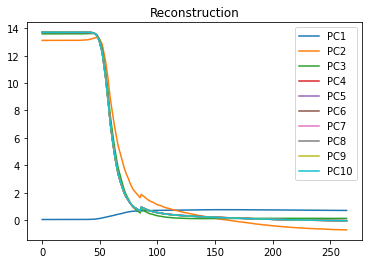

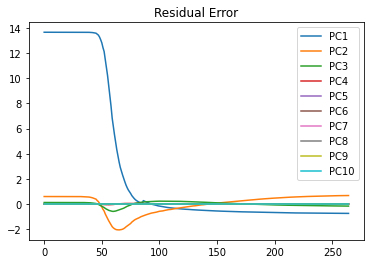

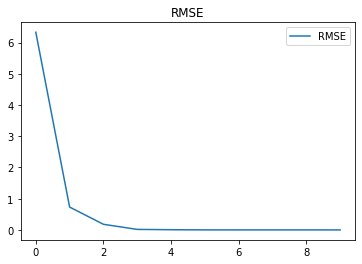

In [ ]:
ReCon('China')
RMSE('China')

# Part 5: MNIST dataset [5 Marks]
MNIST is a dataset for hand-written digits recognition. 
Each image in MNIST has 28x28 pixels which can be represented in the form of an array with 784 elements. In this part we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Compute the covariance of the dataframe and perform eigendecomposition.  **[1]**
* Plot the first 10 eigenvectors. What trends do you observe? **[1]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as $n$ plots of its incremental reconstruction (a first reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[1]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. **[1]**
* With that many components, what would be the compression ratio for a dataset with 1000 images? *Hint: compare the dataset size with a case where we only use principal components and projections* **[1]**

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [ ]:
x.shape

(1000, 784)

Label is: 4


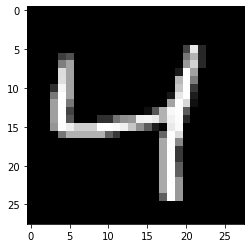

In [ ]:
x.shape
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

In [ ]:
# Part 5 (1):

n, d = x.shape
mu = x.mean(axis=0)
x = x - mu

C = np.dot(x.T, x) # covariance matrix
eigenValues, eigenVectors = np.linalg.eigh(C)

idx = np.argsort(-eigenValues)
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]

print('EigenVector is \n', eigenVectors)
print('\nConvariance matrix is \n', C)

EigenVector is 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Convariance matrix is 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


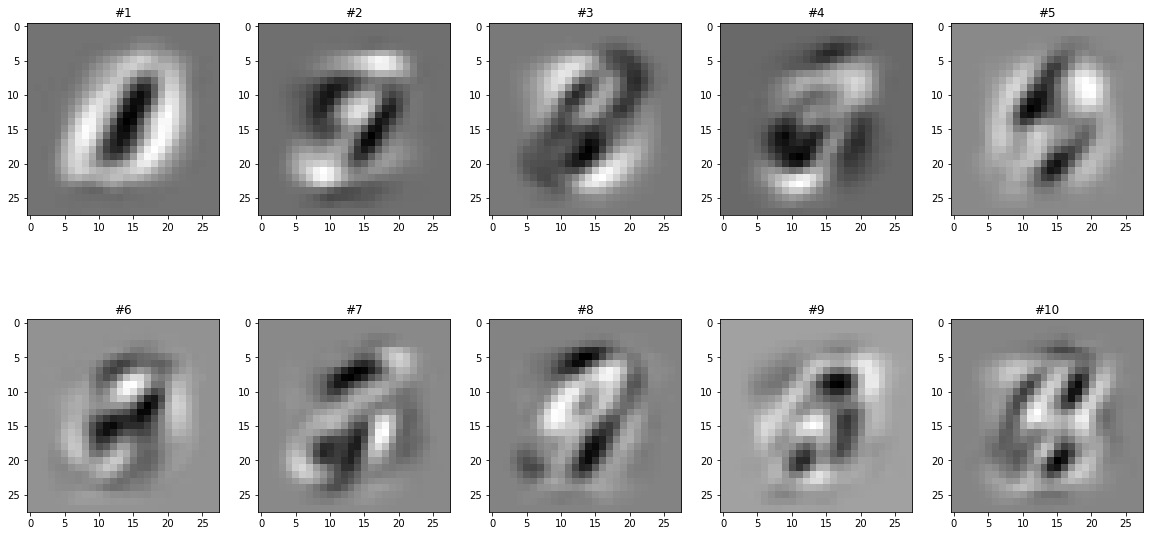

In [ ]:
# Part 5 (2):

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.gcf().set_size_inches(20, 10)
  plt.imshow(eigenVectors[:,i].reshape(-1, 28), cmap = plt.cm.gray)
  plt.title('#{}'.format(i+1)) # Plot the first 10 eigenvectors

# Part 5 (2):
Trend: The graph becomes more and more clear that previous ones with the increasing number of eigenvectors

In [ ]:
# Part 5 (3):

import random
import math

def randimage(n):
  reconImages = []

  IMAGE_IDX = random.randint(0,784) # generate a random integer 
  plt.imshow(x[IMAGE_IDX].reshape(28,28), cmap=plt.cm.gray) # plot the random graph
  plt.title('random image',)
  print('   random image number is', IMAGE_IDX)

  for i in range (1, n+1): 
      P = np.dot (x[IMAGE_IDX].reshape(1, -1) - mu , eigenVectors[:, 0:n]) # projection
      R = np.dot (P , eigenVectors[:, 0:n].T) + mu # reconstruction
      reconImages.append(R.reshape(x[0].shape))

  ROWS = math.ceil(n/3) 
  plt.figure(figsize=(12, ROWS * 4))
  for j in range(0, n):
      plt.subplot(ROWS, 3, j+1)
      plt.imshow(reconImages[j].reshape(28,28), cmap = plt.cm.gray)
      plt.title('#{}'.format(j+1))

   random image number is 730


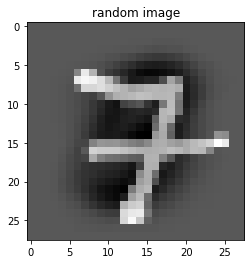

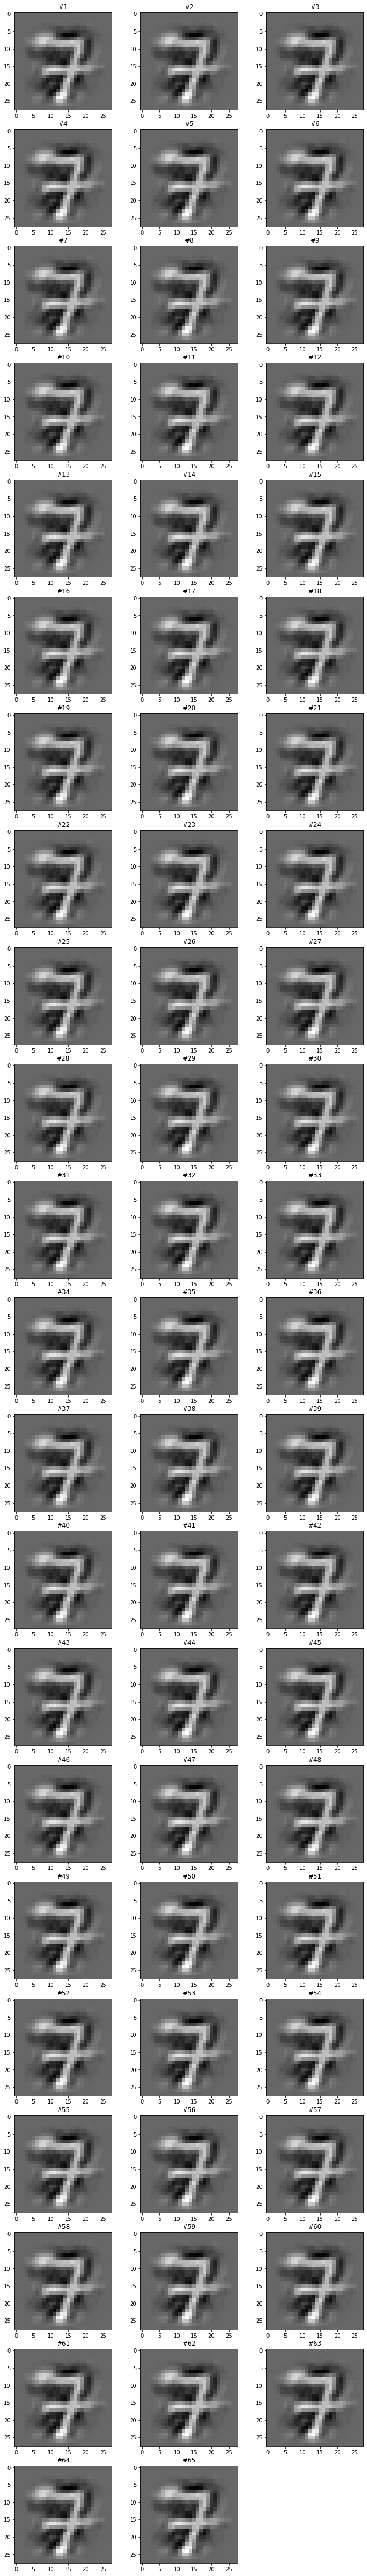

In [ ]:
# Part 5 (4):

randimage(65)

# from the incremental principal components plots, we can see that, for human eys, the number of pcs required to indetify is 30

In [ ]:
# Part 5 (5):
data_size = x.shape
print('The shape of the dataset is ', x.shape)
print('Total elements of the dataset are ', data_size[0]*data_size[1])
pc_numbers = 30
print('From the incremental principal components plots above, we can see that, for human eys, the number of pcs required to indetify is ',pc_numbers)
data_size_compressed = data_size[0]*pc_numbers + data_size[1]*pc_numbers
print('Total number of compressed dataset elements is ', data_size_compressed)
compre_ratio = data_size[0]*data_size[1]/(data_size[0]*pc_numbers + data_size[1]*pc_numbers)
print('The compression ratio is ',compre_ratio)

The shape of the dataset is  (1000, 784)
Total elements of the dataset are  784000
From the incremental principal components plots above, we can see that, for human eys, the number of pcs required to indetify is  30
Total number of compressed dataset elements is  53520
The compression ratio is  14.648729446935725


# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


